In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

from zipfile import ZipFile

pd.options.display.max_columns = None

In [2]:
# We use these to open the zip folder, so we don't have to decompress them
demo_zip = ZipFile('data/ACSDP5Y2018_Demographics.zip')
income_zip = ZipFile('data/ACSST5Y2018_Income.zip')
internet_zip = ZipFile('data/ACSST5Y2018_Internet.zip')

In [3]:
# We fetch relevant demographic information here
demo_rename = {
    "id": "id",
    "Estimate!!RACE!!Total population": "Population",
    "Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)": "Hispanic_Latino",
    "Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Black or African American alone": "Black",
    "Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!White alone": "White",
    "Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Asian alone": "Asian" 
}
new_cols = list(demo_rename.values())

demographics = pd.read_csv(demo_zip.open("ACSDP5Y2018.DP05_data_with_overlays_2020-08-03T214106.csv"), skiprows=1)
demographics.rename(columns=demo_rename, inplace=True)
demographics = demographics[new_cols]

for col in new_cols[2:]:
    demographics[col] = pd.to_numeric(demographics[col], errors='coerce')
    demographics[col] = demographics[col].replace(np.nan, 0, regex=True)
    demographics[col] = demographics[col]/100

demographics.head()

,id,Population,Hispanic_Latino,Black,White,Asian
0,1400000US48113000100,3937,0.106,0.075,0.755,0.034
1,1400000US48113000201,2987,0.116,0.000,0.859,0.005
2,1400000US48113000202,3943,0.209,0.017,0.723,0.028
3,1400000US48113000300,4231,0.116,0.022,0.782,0.048
4,1400000US48113000401,5543,0.414,0.134,0.372,0.050


In [4]:
# We fetch income information here 
income_rename = {
    "id": "id",
    "Geographic Area Name": "area_name",
    'Estimate!!Households!!Total': "Households",
    'Estimate!!Households!!Total!!Less than $10,000': "00_10K",
    'Estimate!!Households!!Total!!$10,000 to $14,999': "10_15K",
    'Estimate!!Households!!Total!!$15,000 to $24,999': "15_25K",
    'Estimate!!Households!!Total!!$25,000 to $34,999': "25_35K",
    'Estimate!!Households!!Total!!$35,000 to $49,999': "35_50K",
    'Estimate!!Households!!Total!!$50,000 to $74,999': "50_75K",
    'Estimate!!Households!!Total!!$75,000 to $99,999': "75_100K",
    'Estimate!!Households!!Total!!$100,000 to $149,999': "100_150K",
    'Estimate!!Households!!Total!!$150,000 to $199,999': "150_200K",
    'Estimate!!Households!!Total!!$200,000 or more': "200K_UP"
}
new_cols = list(income_rename.values())

income = pd.read_csv(income_zip.open("ACSST5Y2018.S1901_data_with_overlays_2020-08-03T221028.csv"), skiprows=1)
income.rename(columns=income_rename, inplace=True)
for col in new_cols[3:]:
    income[col] = pd.to_numeric(income[col], errors='coerce')
    income[col] = income[col].replace(np.nan, 0, regex=True)
    income[col] = income[col]/100

income = income[new_cols]
income.head()

,id,area_name,Households,00_10K,10_15K,15_25K,25_35K,35_50K,50_75K,75_100K,100_150K,150_200K,200K_UP
0,1400000US48113000100,"Census Tract 1, Dallas County, Texas",1849,0.051,0.010,0.028,0.049,0.059,0.161,0.097,0.144,0.072,0.330
1,1400000US48113000201,"Census Tract 2.01, Dallas County, Texas",1407,0.032,0.000,0.036,0.026,0.068,0.069,0.109,0.191,0.083,0.387
2,1400000US48113000202,"Census Tract 2.02, Dallas County, Texas",1971,0.021,0.041,0.075,0.070,0.083,0.172,0.056,0.170,0.130,0.182
3,1400000US48113000300,"Census Tract 3, Dallas County, Texas",2022,0.047,0.052,0.018,0.017,0.116,0.121,0.108,0.169,0.053,0.297
4,1400000US48113000401,"Census Tract 4.01, Dallas County, Texas",1893,0.068,0.043,0.116,0.125,0.082,0.287,0.119,0.105,0.048,0.006


In [5]:
# We get the relevant broadband/internet info here 
internet_rename = {
    "id": "id",
    "Estimate!!Percent!!TYPE OF INTERNET SUBSCRIPTIONS!!With an Internet subscription": "with_internet",
    "Estimate!!Percent!!TYPE OF INTERNET SUBSCRIPTIONS!!With an Internet subscription!!Dial-up with no other type of Internet subscription": "dialup_internet",
    "Estimate!!Percent!!TYPE OF INTERNET SUBSCRIPTIONS!!With an Internet subscription!!Broadband of any type": "any_broadband",
    "Estimate!!Percent!!TYPE OF INTERNET SUBSCRIPTIONS!!With an Internet subscription!!Broadband of any type!!Cellular data plan": "with_cellular_broadband",
    "Estimate!!Percent!!TYPE OF INTERNET SUBSCRIPTIONS!!With an Internet subscription!!Broadband of any type!!Cellular data plan!!Cellular data plan with no other type of Internet subscription": "only_cellular_broadband",
    "Estimate!!Percent!!TYPE OF INTERNET SUBSCRIPTIONS!!With an Internet subscription!!Broadband of any type!!Broadband such as cable, fiber optic or DSL": "cable_broadband",
    "Estimate!!Percent!!TYPE OF INTERNET SUBSCRIPTIONS!!With an Internet subscription!!Broadband of any type!!Satellite Internet service": "satellite_broadband",
    "Estimate!!Percent!!TYPE OF INTERNET SUBSCRIPTIONS!!Without an Internet subscription": "no_internet"
}
new_cols = list(internet_rename.values())

internet = pd.read_csv(internet_zip.open("ACSST5Y2018.S2801_data_with_overlays_2020-08-03T220825.csv"), skiprows=1)

internet.rename(columns=internet_rename, inplace=True)
for col in new_cols[1:]:
    internet[col] = pd.to_numeric(internet[col], errors='coerce')
    internet[col] = internet[col].replace(np.nan, 0, regex=True)
    internet[col] = internet[col]/100
internet = internet[new_cols]

internet.head()

,id,with_internet,dialup_internet,any_broadband,with_cellular_broadband,only_cellular_broadband,cable_broadband,satellite_broadband,no_internet
0,1400000US48113000100,0.973,0.0,0.973,0.802,0.055,0.913,0.041,0.027
1,1400000US48113000201,0.911,0.0,0.911,0.709,0.054,0.831,0.050,0.089
2,1400000US48113000202,0.923,0.0,0.923,0.741,0.060,0.832,0.035,0.077
3,1400000US48113000300,0.961,0.0,0.961,0.808,0.063,0.852,0.083,0.039
4,1400000US48113000401,0.793,0.0,0.793,0.641,0.145,0.612,0.053,0.207


In [8]:
# We join demographic, internet, and income information using the census tract ID as the key
joined = pd.merge(income, internet, on='id')
joined = pd.merge(joined, demographics, on='id')

joined = joined[~joined["id"].isin(["1400000US48113980100","1400000US48113980000"])] # Filters out Dallas airports (2)

joined.to_csv("data/dallas_demographics_enriched.csv", index=False)
joined.head()

,id,area_name,Households,00_10K,10_15K,15_25K,25_35K,35_50K,50_75K,75_100K,100_150K,150_200K,200K_UP,with_internet,dialup_internet,any_broadband,with_cellular_broadband,only_cellular_broadband,cable_broadband,satellite_broadband,no_internet,Population,Hispanic_Latino,Black,White,Asian
0,1400000US48113000100,"Census Tract 1, Dallas County, Texas",1849,0.051,0.010,0.028,0.049,0.059,0.161,0.097,0.144,0.072,0.330,0.973,0.0,0.973,0.802,0.055,0.913,0.041,0.027,3937,0.106,0.075,0.755,0.034
1,1400000US48113000201,"Census Tract 2.01, Dallas County, Texas",1407,0.032,0.000,0.036,0.026,0.068,0.069,0.109,0.191,0.083,0.387,0.911,0.0,0.911,0.709,0.054,0.831,0.050,0.089,2987,0.116,0.000,0.859,0.005
2,1400000US48113000202,"Census Tract 2.02, Dallas County, Texas",1971,0.021,0.041,0.075,0.070,0.083,0.172,0.056,0.170,0.130,0.182,0.923,0.0,0.923,0.741,0.060,0.832,0.035,0.077,3943,0.209,0.017,0.723,0.028
3,1400000US48113000300,"Census Tract 3, Dallas County, Texas",2022,0.047,0.052,0.018,0.017,0.116,0.121,0.108,0.169,0.053,0.297,0.961,0.0,0.961,0.808,0.063,0.852,0.083,0.039,4231,0.116,0.022,0.782,0.048
4,1400000US48113000401,"Census Tract 4.01, Dallas County, Texas",1893,0.068,0.043,0.116,0.125,0.082,0.287,0.119,0.105,0.048,0.006,0.793,0.0,0.793,0.641,0.145,0.612,0.053,0.207,5543,0.414,0.134,0.372,0.050


,TFID,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,BLOCKCE10,SUFFIX1CE,ZCTA5CE10,UACE10,PUMACE10,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,COUSUBFP,SUBMCDFP,ESTATEFP,CONCTYFP,PLACEFP,AIANNHFP,AIANNHCE,COMPTYP,TRSUBFP,TRSUBCE,ANRCFP,TTRACTCE,TBLKGPCE,ELSDLEA,SCSDLEA,UNSDLEA,CD115FP,SLDUST,SLDLST,CSAFP,CBSAFP,METDIVFP,CNECTAFP,NECTAFP,NCTADVFP,LWFLAG,OFFSET,ATOTAL,INTPTLAT,INTPTLON,geometry
0,260600779,48,113,006900,1,1002,None,75211,22042,02315,48,113,006900,1,93682,None,None,None,19000,None,None,None,None,None,None,None,None,None,None,16230,33,023,103,206,19100,19124,None,None,None,L,N,232,+32.7671733,-96.8625783,"POLYGON ((-96.86265499999999 32.767246, -96.86..."
1,229940566,48,113,009804,4,4002,None,75220,22042,02311,48,113,009804,4,92792,None,None,None,19000,None,None,None,None,None,None,None,None,None,None,16230,33,016,103,206,19100,19124,None,None,None,L,N,21728,+32.8751135,-96.8727268,"POLYGON ((-96.87348299999999 32.87581, -96.871..."
2,216016781,48,113,014702,2,2004,None,75061,22042,02320,48,113,014702,2,93682,None,None,None,37000,None,None,None,None,None,None,None,None,None,None,24420,33,009,105,206,19100,19124,None,None,None,L,N,760,+32.8231060,-96.9260803,"POLYGON ((-96.92604399999999 32.823307, -96.92..."
3,216022215,48,113,000406,5,5038,None,75235,22042,02312,48,113,000406,5,92792,None,None,None,19000,None,None,None,None,None,None,None,None,None,None,16230,33,023,103,206,19100,19124,None,None,None,L,N,78099,+32.8248765,-96.8499112,"POLYGON ((-96.85229299999999 32.824094, -96.84..."
4,216023611,48,113,010804,1,1018,None,75233,22042,02316,48,113,010804,1,93682,None,None,None,19000,None,None,None,None,None,None,None,None,None,None,16230,33,023,104,206,19100,19124,None,None,None,L,N,28403,+32.7198335,-96.8640756,"POLYGON ((-96.86572199999999 32.720256, -96.86..."


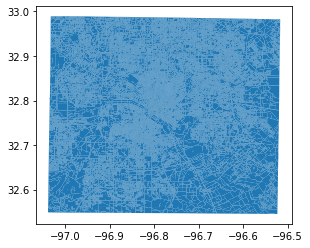

In [11]:
# We use the shapefile to visualize on a map
# However the shapefile is divided on Census blocks, we need tracts
zipfile = "zip://./data/dallas_county_shapefiles.zip"
dallas_cb = gpd.read_file(zipfile)
dallas_cb.plot()
dallas_cb.head()

In [13]:
# We add an ID column to much later join (in tableau) it with our enriched demographic data
dallas_cb['id'] = "1400000US" + dallas_cb["STATEFP10"]+dallas_cb["COUNTYFP10"]+dallas_cb["TRACTCE10"]

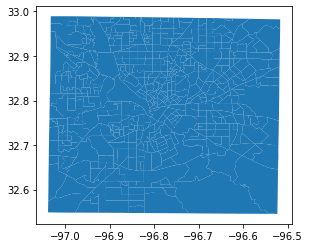

In [14]:
# Here we merge census blocks with the same tract ID to get our precious tracts
dallas_tracts = dallas_cb.dissolve(by='id')
dallas_tracts = dallas_tracts.reset_index() #this makes the id into a column again
dallas_tracts.plot()

In [17]:
# let's get rid of those airports 
print("Tracts: ", len(dallas_tracts))
dallas_sans_airports = dallas_tracts[~dallas_tracts["id"].isin(["1400000US48113980100","1400000US48113980000"])]
print("Tracts: ", len(dallas_sans_airports))

# and unwanted columns 
dallas_sans_airports = dallas_tracts[["id", "geometry","INTPTLAT","INTPTLON"]]

dallas_sans_airports.head()

Tracts:  530
Tracts:  528


,id,geometry,INTPTLAT,INTPTLON
0,1400000US48113000100,"POLYGON ((-96.73241999999999 32.80795, -96.733...",+32.8188592,-96.7413742
1,1400000US48113000201,"POLYGON ((-96.76150799999999 32.822916, -96.76...",+32.8250054,-96.7590993
2,1400000US48113000202,"POLYGON ((-96.76154099999999 32.823826, -96.76...",+32.8284108,-96.7646939
3,1400000US48113000300,"POLYGON ((-96.78543599999999 32.822304, -96.78...",+32.8239753,-96.7786668
4,1400000US48113000401,"POLYGON ((-96.815682 32.798982, -96.815612 32....",+32.8107362,-96.8311927


In [19]:
# And save to a shapefile
dallas_sans_airports.to_file("data/dallas_tracts.shp")

# NOTE: YOU WILL NEED TO MOVE THE FILES IT CREATES INTO A ZIP FOLDER

In [21]:
print("And we're done with preprocessing!")

And we're done with preprocessing!
